In [ ]:
인공지능 투자 전략 검증방법: 백테스팅
백테스팅이란? 
용도
투자 전략이 과거 시점에서 제대로 동작하는지 확인
주요기능
초기 투자 금액 설정
시작일, 종료일 설정
매매, 수익 정보 제공

In [ ]:
#백 테스팅 툴 중 하나인 백 트레이더
# pip install backtrader

In [123]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pyfolio as pf
import numpy as np

df_krx=fdr.StockListing('KRX') 
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 0 to 6991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6992 non-null   object        
 1   Market          6992 non-null   object        
 2   Name            6992 non-null   object        
 3   Sector          2437 non-null   object        
 4   Industry        2418 non-null   object        
 5   ListingDate     2437 non-null   datetime64[ns]
 6   SettleMonth     2437 non-null   object        
 7   Representative  2437 non-null   object        
 8   HomePage        2257 non-null   object        
 9   Region          2437 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 600.9+ KB


In [124]:
name=input('주식 코드 기업명:')
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명:쿠쿠


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4602,192400,KOSPI,쿠쿠홀딩스,기타 금융업,주방용 전기기기 제조업,2014-08-06,12월,구본학,http://www.cuckoo.co.kr,경상남도
4603,284740,KOSPI,쿠쿠홈시스,개인 및 가정용품 임대업,"정수기, 공기청정기 등",2018-01-11,12월,구본학,"http://www,cuckoo.co.kr",경기도


In [125]:
df = fdr.DataReader('284740','2020-03-01') # 쿠쿠홈시스

In [126]:
df = df[['Close']]
df.head()

,Close
Date,
2020-03-02,39400
2020-03-03,41750
2020-03-04,40450
2020-03-05,40450
2020-03-06,38450


In [129]:
# df.pct_change(n)
# : 인접한 n개 값의 차이를 계산해준다.
# : 0보다 크다는 것은 n일 전 대비 상승하고 있다.
df = df[['Close']]
df['return'] = df['Close'].pct_change().fillna(0)
df['ma_s'] = df['Close'].rolling(5).mean()
df['ma_l'] = df['Close'].rolling(120).mean()

# 매매 신호
# (단기 이평선 > 장기 이평선)일 경우 2 아니면 -2
cond = df['ma_s'] > df['ma_l'] 
df['Trading_Signal'] = np.where(cond, 2, -2) 
df.head(50)

,Close,return,ma_s,ma_l,Trading_Signal
Date,,,,,
2020-03-02,39400,0.000000,NaN,NaN,-2
2020-03-03,41750,0.059645,NaN,NaN,-2
2020-03-04,40450,-0.031138,NaN,NaN,-2
2020-03-05,40450,0.000000,NaN,NaN,-2
2020-03-06,38450,-0.049444,40100.0,NaN,-2
2020-03-09,36500,-0.050715,39520.0,NaN,-2
2020-03-10,35800,-0.019178,38330.0,NaN,-2
2020-03-11,34850,-0.026536,37210.0,NaN,-2
2020-03-12,32450,-0.068867,35610.0,NaN,-2


<IPython.core.display.Javascript object>


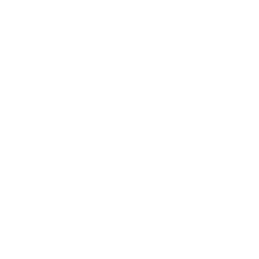

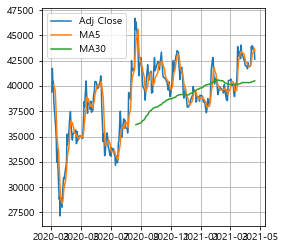

In [132]:
plt.figure(figsize=(4,4))
plt.plot(df.index, df['Close'], label="Adj Close")
plt.plot(df.index, df['ma_s'], label="MA5")
plt.plot(df.index, df['ma_l'], label="MA30")
plt.legend(loc='best')
plt.grid()
plt.show()